<a href="https://colab.research.google.com/github/sebasmano25/08MBDI-TP-Manosalvas/blob/main/Trabajo_Practico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import io
import requests
import timeit
from datetime import datetime
import plotly.express as px
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [2]:
#Cargando datos de pasajeros de Titanic desde un github
url="https://raw.githubusercontent.com/sebasmano25/08MBDI-TP-Manosalvas/main/coffee.csv"
s=requests.get(url).content
coffee=pd.read_csv(io.StringIO(s.decode('utf8')))

In [3]:
# Información del dataset
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

In [4]:
#contar los datos nulos
coffee.isnull().sum()

Unnamed: 0                 0
ID                         0
Country of Origin          0
Farm Name                  2
Lot Number                 1
Mill                       3
ICO Number               132
Company                    0
Altitude                   1
Region                     2
Producer                   1
Number of Bags             0
Bag Weight                 0
In-Country Partner         0
Harvest Year               0
Grading Date               0
Owner                      0
Variety                    6
Status                     0
Processing Method          5
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean Cup                  0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category One Defects       0
Quakers       

In [5]:
#% de nulos
(coffee.isnull().sum())/(len(coffee))*100

Unnamed: 0                0.000000
ID                        0.000000
Country of Origin         0.000000
Farm Name                 0.966184
Lot Number                0.483092
Mill                      1.449275
ICO Number               63.768116
Company                   0.000000
Altitude                  0.483092
Region                    0.966184
Producer                  0.483092
Number of Bags            0.000000
Bag Weight                0.000000
In-Country Partner        0.000000
Harvest Year              0.000000
Grading Date              0.000000
Owner                     0.000000
Variety                   2.898551
Status                    0.000000
Processing Method         2.415459
Aroma                     0.000000
Flavor                    0.000000
Aftertaste                0.000000
Acidity                   0.000000
Body                      0.000000
Balance                   0.000000
Uniformity                0.000000
Clean Cup                 0.000000
Sweetness           

In [6]:
coffee.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,Japan Coffee Exchange,2022,"September 21st, 2022",Coffee Quality Union,Gesha,Completed,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,0.0,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,24 kg,Japan Coffee Exchange,2022,"March 6th, 2023",Coffee Quality Union,Red Bourbon,Completed,"Honey,Mossto",8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,0.0,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [7]:
#Elimino columnas que no voy a usar
columns_drop = ['ID', 'ICO Number', 'In-Country Partner', 'Certification Address', 'Certification Contact']
coffee = coffee.drop(columns=columns_drop)
coffee.columns

Index(['Unnamed: 0', 'Country of Origin', 'Farm Name', 'Lot Number', 'Mill',
       'Company', 'Altitude', 'Region', 'Producer', 'Number of Bags',
       'Bag Weight', 'Harvest Year', 'Grading Date', 'Owner', 'Variety',
       'Status', 'Processing Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness',
       'Overall', 'Defects', 'Total Cup Points', 'Moisture Percentage',
       'Category One Defects', 'Quakers', 'Color', 'Category Two Defects',
       'Expiration', 'Certification Body'],
      dtype='object')

Text(0, 0.5, 'Cantidad')

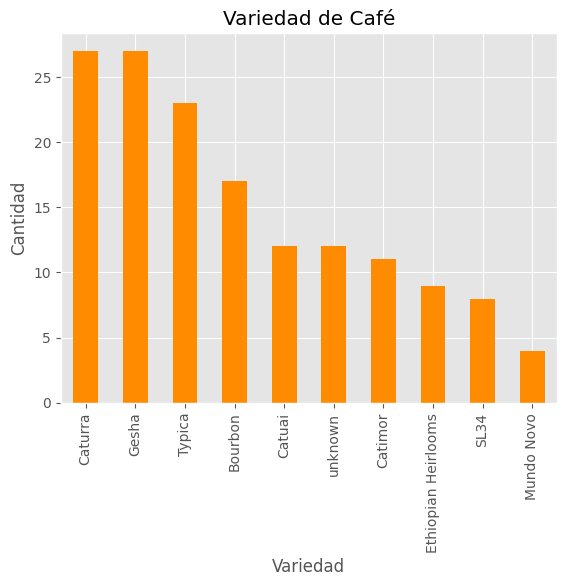

In [9]:
ax = coffee['Variety'].value_counts().head(10).plot(kind='bar', title='Variedad de Café', color='darkorange')
ax.set_xlabel('Variedad')
ax.set_ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

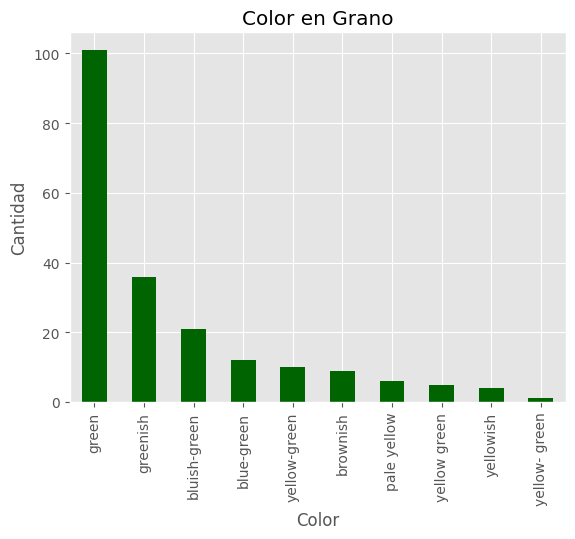

In [22]:
color = coffee['Color'].value_counts().head(10).plot(kind='bar', title='Color en Grano', color='darkgreen')
color.set_xlabel('Color')
color.set_ylabel('Cantidad')

In [15]:
productores = coffee['Producer'].value_counts().reset_index()
productores.columns = ['Producer', 'Farm Count']
productores_des = productores.sort_values('Farm Count', ascending=False)
top_productores = productores_des.head(20)
fig = px.bar(top_productores, x='Producer', y='Farm Count',
             title='Top Productores', labels={'Farm Count': '# Fincas','Producer': 'Productor'})

fig.show()

fig.write_html("top_prod.html")

fig = px.sunburst(top_productores, path=['Producer'], values='Farm Count',
                  title='Top Productores', labels={'Farm Count': '# Fincas','Producer': 'Productor'})

fig.show()

In [ ]:
#Añadir nuevas columas: is_old, is_baby

def is_old_func(row):
  return row['age']>60

titanic['is_old'] = titanic.apply(is_old_func, axis = 'columns')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False


In [ ]:
titanic.eval(' is_baby = age<15', inplace = True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False


In [ ]:
#Definir una nueva variable numérica : class_num
def class_num_func(row):
  Clase={'First':1, 'Second':2, 'Third':3}
  return Clase[row.clase]

titanic['class_num'] = titanic.apply(class_num_func, axis = 'columns')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


In [ ]:
#Consultas con condiciones
titanic[
    (titanic.sex == 'female')
    & (titanic['clase'].isin(['First','Third']))
    & (titanic.age > 45)
    & (titanic.survived == 0)
]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


<Axes: xlabel='pclass', ylabel='count'>

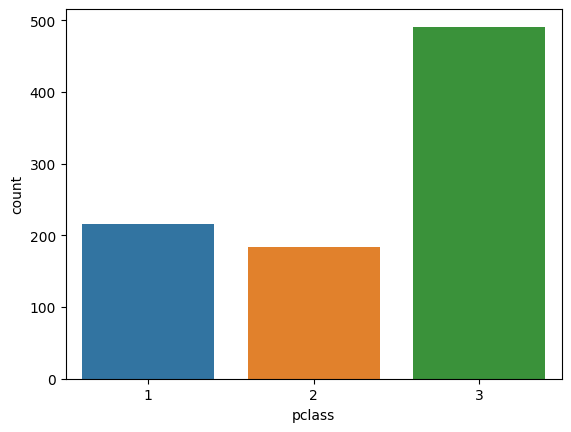

In [ ]:
#Distribución de las clases
sns.countplot(x = "pclass",data = titanic)

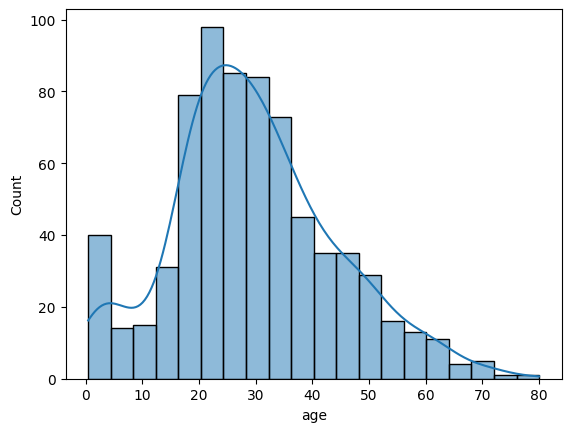

In [ ]:
#Distribución de la edad
sns.histplot(titanic.age.dropna(), kde=True)
plt.show()

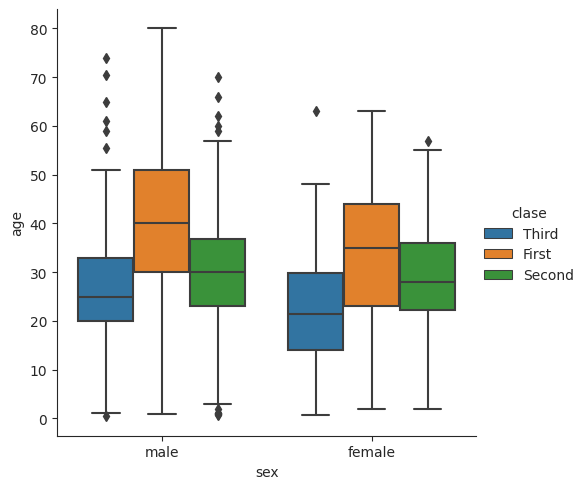

In [ ]:
# Boxplot de la edad por género (sex) y clase
with sns.axes_style(style = 'ticks'):
  ax = sns.catplot(data = titanic, x='sex', y = 'age', hue = 'clase', kind = 'box')

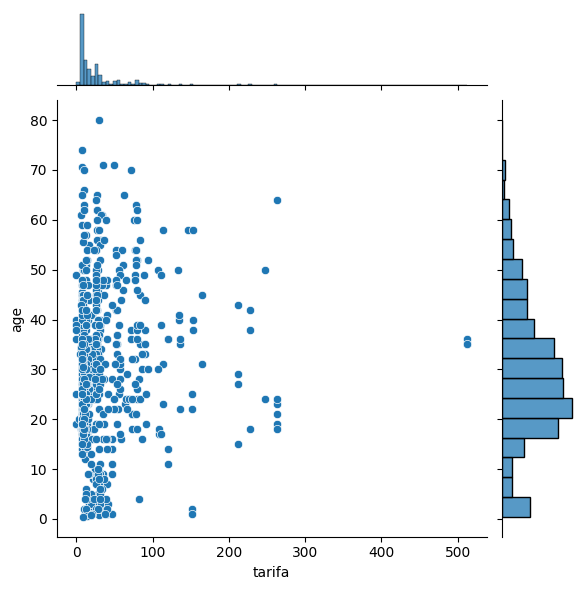

In [ ]:
#Distribución cruzada de Edad y Tarifa
sns.jointplot(x = 'tarifa', y = 'age', data = titanic)

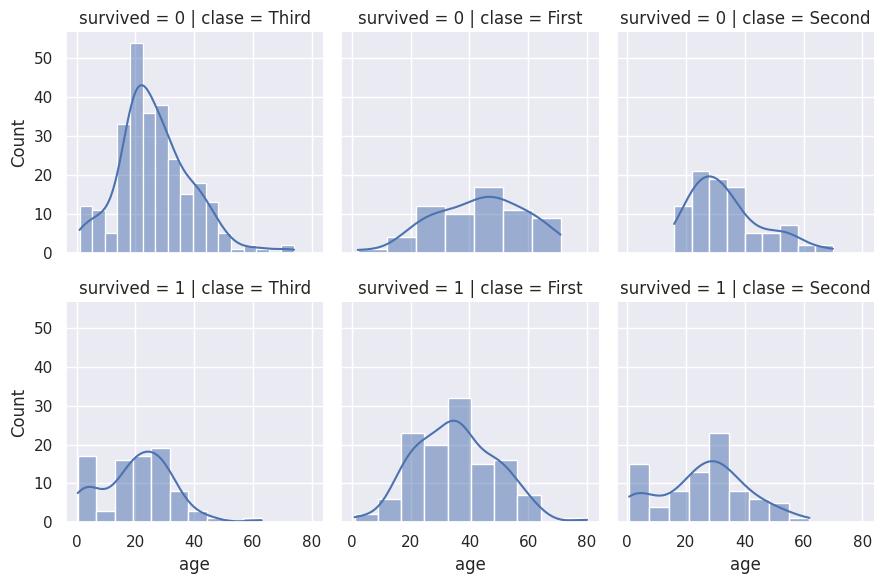

In [ ]:
##Cambiar el font
sns.set(font_scale = 1)

#FacetGrid - construir matriz de gráficos
g = sns.FacetGrid(titanic, row = 'survived' , col = 'clase')
g.map(sns.histplot,'age', kde = True)
plt.show()